In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
from keras.utils import to_categorical

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns

%matplotlib inline

In [31]:
train = pd.read_csv('Train.csv')

In [32]:
test = pd.read_csv('Test.csv')

In [33]:
train.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [34]:
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [35]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [36]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [37]:
train.shape

(8523, 12)

In [38]:
test.shape

(5681, 11)

In [39]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [43]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [44]:
train['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [45]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [46]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [47]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [48]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
train['Item_Visibility'].hist(bins=20)

In [19]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

# Impute missing values

# Item_Weight
Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier.

To check that we have imputed the values in a reasonable way, we can check the average weight per Outlet_Identifier before and after imputing the missing values.

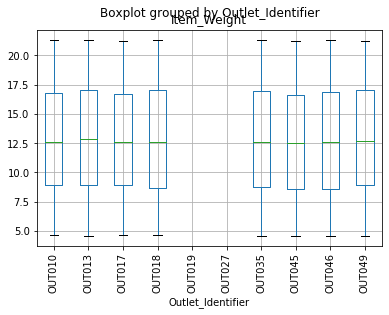

In [8]:
train.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [9]:
# average weight per item
item_av_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


# Outlet_Size
It could be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet_Type.

Let's have a look at the mode size for each Outlet_Type.

In [14]:
from scipy.stats import mode
# replace all nan values with 'unknown', because the mode function of stats can not compare a float (NaN) and a string
train['Outlet_Size'] = train['Outlet_Size'].fillna('unknown')

# mode size per Outlet_Type
outlet_type_mode_size = train.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Text(0.5, 1.0, '')

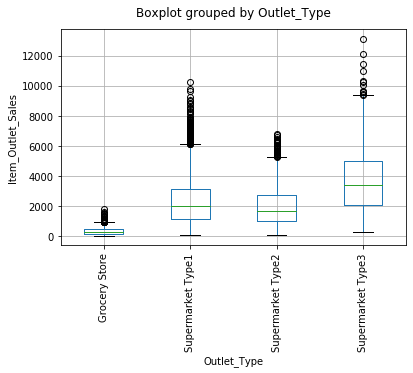

In [15]:
# sales per Outlet_Type
ax = train.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

# Analysis

In [20]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Item_MRP
As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.

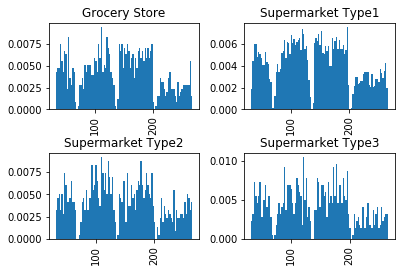

In [19]:
ax = train.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

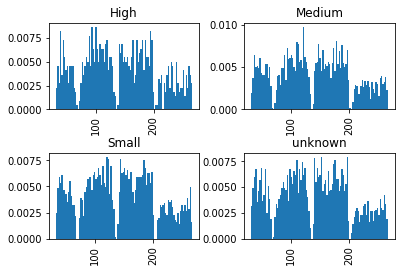

In [20]:
ax = train.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

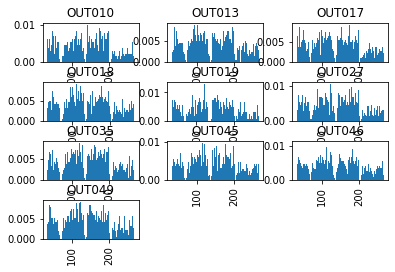

In [21]:
ax = train.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

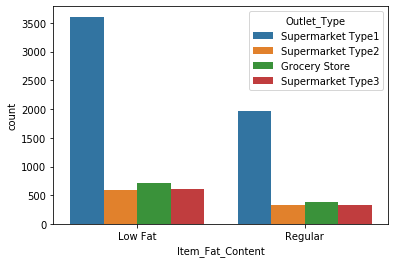

In [28]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Type', data=train)


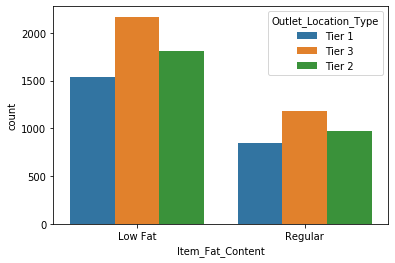

In [29]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Location_Type', data=train)


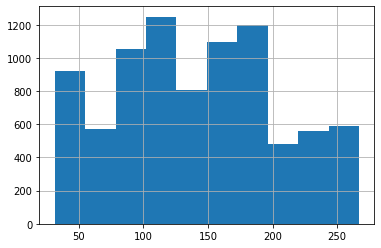

In [30]:
train['Item_MRP'].hist()


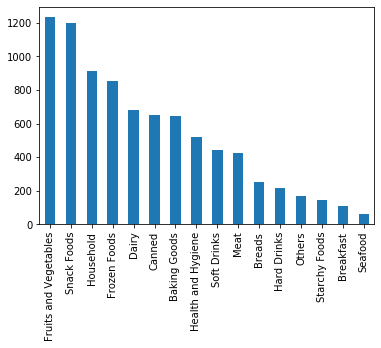

In [31]:
train.Item_Type.value_counts().plot(kind='bar')


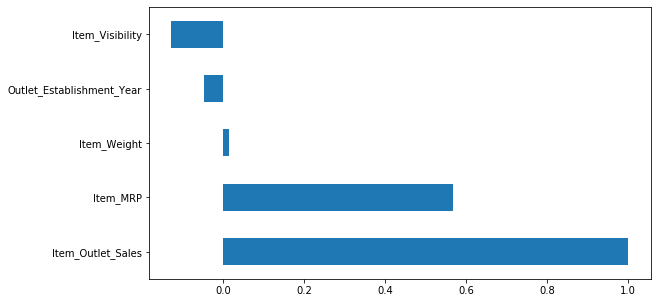

In [34]:
corr_matrix = train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False).plot.barh(figsize=(9, 5))
#save_fig("sales_correlation_bar_plot")

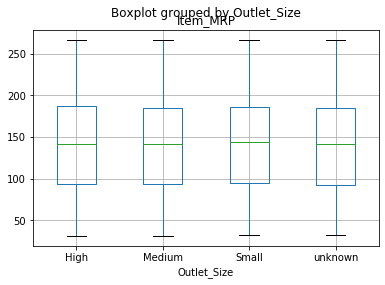

In [35]:
train.boxplot(column='Item_MRP', by='Outlet_Size')


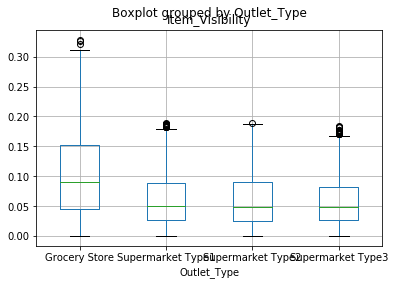

In [36]:
train.boxplot(column='Item_Visibility', by='Outlet_Type')


In [49]:
train['Item_Identifier'].value_counts()
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [21]:
''''
sns.distplot(train['Item_MRP']); 
train['Item_MRP'].plot.graph(figsize=(16,5)) 
plt.show()
'''

"'\nsns.distplot(train['Item_MRP']); \ntrain['Item_MRP'].plot.graph(figsize=(16,5)) \nplt.show()\n"

In [5]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
train['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

# Numerical and One-Hot Coding of Categorical variables

In [10]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True) 
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True) 


In [11]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_Combined           0
Outlet                       0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [13]:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,1,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
train.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
#train = data.loc[data['source']=="train"]
#test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
#test.drop(['Item_Outlet_Sales','source],axis=1,inplace=True)
#train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

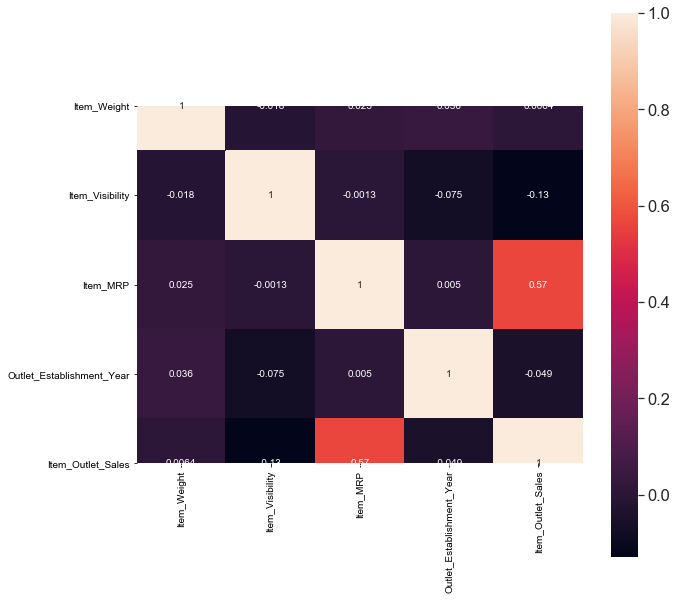

In [24]:

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


In [25]:
pd.set_option('display.width', 200)
pd.set_option('precision', 3)
correlations = train.corr(method='pearson')
print(correlations)

                           Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
Item_Weight                      1.000           -0.018     0.025                      0.036              0.006
Item_Visibility                 -0.018            1.000    -0.001                     -0.075             -0.129
Item_MRP                         0.025           -0.001     1.000                      0.005              0.568
Outlet_Establishment_Year        0.036           -0.075     0.005                      1.000             -0.049
Item_Outlet_Sales                0.006           -0.129     0.568                     -0.049              1.000


In [26]:
skew = train.skew()
print(skew)

Item_Weight                  0.175
Item_Visibility              1.167
Item_MRP                     0.127
Outlet_Establishment_Year   -0.397
Item_Outlet_Sales            1.178
dtype: float64


In [27]:
train=train.drop('Outlet_Location_Type',axis=1) 

In [28]:
#train=train.drop('Outlet_Identifier') 

In [29]:
train=train.drop('Item_Identifier',axis=1) 
test=test.drop('Item_Identifier',axis=1)

In [30]:
X = train.drop('Item_Outlet_Sales',axis=1) 
y = train.Item_Outlet_Sales

In [31]:
X = train.drop('Outlet_Size',axis=1)

In [32]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.25)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pred_cv = regressor.predict(x_cv)

In [39]:
accuracy_score(y_cv,pred_cv)

ValueError: continuous is not supported

In [16]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [17]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [18]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [19]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression Model:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train, test_size =0.25)

In [26]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Predicting the test set results
y_pred = regressor.predict(x_cv)

In [28]:
y_pred

array([3253.42872564, 2792.51991664, 2034.82583948, ..., 2331.79217895,
       2689.78807024, 1509.81641529])

In [57]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score


In [53]:
lr_accuracy = round(regressor.score(x_train,y_train) * 100,2)
lr_accuracy

56.15

In [55]:
r2_score(y_train, regressor.predict(x_train))

0.5615467071190856